In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sqlalchemy import create_engine
import datetime
import geopandas as gpd
import geoplot as gplt
import contextily as ctx
from shapely.geometry import Point, Polygon
import descartes
%matplotlib inline

/Users/ju/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [8]:
engine = create_engine("sqlite:///stations.db")

In [9]:
geo_data = pd.read_sql('SELECT * FROM stations_table;', engine)

In [10]:
geo_data

,STATION_ID,COMPLEX_ID,GTFS_STOP_ID,DIVISION,LINE,STATION,BOROUGH,DAYTIME_ROUTES,STRUCTURE,LAT,LONG,NORTH_DIRECTION,SOUTH_DIRECTION,ADA,ADA_NOTES
0,1,1,R01,BMT,Astoria,Astoria-Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,,Manhattan,0,
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,1,
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,0,
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,0,
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,517,517,S15,SIR,Staten Island,Prince's Bay,SI,SIR,Open Cut,40.525507,-74.200064,St George,Tottenville,0,
491,518,518,S14,SIR,Staten Island,Pleasant Plains,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville,0,
492,519,519,S13,SIR,Staten Island,Richmond Valley,SI,SIR,Open Cut,40.519631,-74.229141,St George,Tottenville,0,
493,522,522,S09,SIR,Staten Island,Tottenville,SI,SIR,At Grade,40.512764,-74.251961,St George,,1,


In [11]:
top_stations = pd.read_sql("SELECT STATION, LAT, LONG FROM stations_table WHERE STATION IN ('DeKalb Av','42 St-Port Authority Bus Terminal','125 St','Times Sq-42 St','23 St','Fulton St','34 St-Herald Sq','183 St','104 St','Chambers St');",engine)

In [1]:
#top_stations_clean = top_stations.drop([18,27,28,14,10,15,19,24,7,13,11,20,12,16,21,25,17,23,26])

In [14]:
coordinates = pd.read_sql('SELECT STATION, LAT, LONG FROM stations_table;',engine)

In [15]:
coordinates

,STATION,LAT,LONG
0,Astoria-Ditmars Blvd,40.775036,-73.912034
1,Astoria Blvd,40.770258,-73.917843
2,30 Av,40.766779,-73.921479
3,Broadway,40.761820,-73.925508
4,36 Av,40.756804,-73.929575
...,...,...,...
490,Prince's Bay,40.525507,-74.200064
491,Pleasant Plains,40.522410,-74.217847
492,Richmond Valley,40.519631,-74.229141
493,Tottenville,40.512764,-74.251961


In [16]:
coordinates = coordinates.drop(0)

In [17]:
coordinates

,STATION,LAT,LONG
1,Astoria Blvd,40.770258,-73.917843
2,30 Av,40.766779,-73.921479
3,Broadway,40.761820,-73.925508
4,36 Av,40.756804,-73.929575
5,39 Av-Dutch Kills,40.752882,-73.932755
...,...,...,...
490,Prince's Bay,40.525507,-74.200064
491,Pleasant Plains,40.522410,-74.217847
492,Richmond Valley,40.519631,-74.229141
493,Tottenville,40.512764,-74.251961


In [18]:
pd.set_option('display.max_rows', 496)

In [19]:
coordinates

,STATION,LAT,LONG
1,Astoria Blvd,40.770258,-73.917843
2,30 Av,40.766779,-73.921479
3,Broadway,40.761820,-73.925508
4,36 Av,40.756804,-73.929575
5,39 Av-Dutch Kills,40.752882,-73.932755
6,Lexington Av/59 St,40.762660,-73.967258
7,5 Av/59 St,40.764811,-73.973347
8,57 St-7 Av,40.764664,-73.980658
9,49 St,40.759901,-73.984139
10,Times Sq-42 St,40.754672,-73.986754


In [20]:
def make_point(row):
    return Point(row.LAT, row.LONG)

In [21]:
points = top_stations.apply(make_point, axis=1)

In [22]:
stationgeodf = gpd.GeoDataFrame(top_stations, geometry=points)

In [23]:
stationgeodf.crs = {'init': 'epsg:4326'}

/Users/ju/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [24]:
stationgeodf.head()

,STATION,LAT,LONG,geometry
0,Times Sq-42 St,40.754672,-73.986754,POINT (40.75467 -73.98675)
1,34 St-Herald Sq,40.749567,-73.987950,POINT (40.74957 -73.98795)
2,23 St,40.741303,-73.989344,POINT (40.74130 -73.98934)
3,DeKalb Av,40.690635,-73.981824,POINT (40.69064 -73.98182)
4,104 St,40.695178,-73.844330,POINT (40.69518 -73.84433)


<AxesSubplot:>

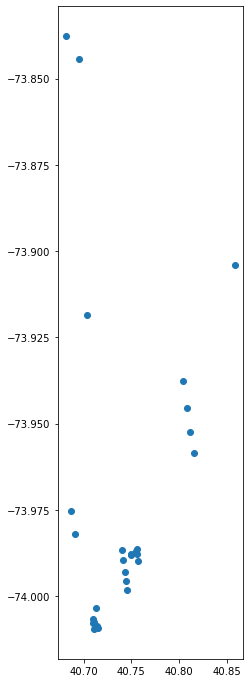

In [25]:
stationgeodf.plot(figsize=(12,12))

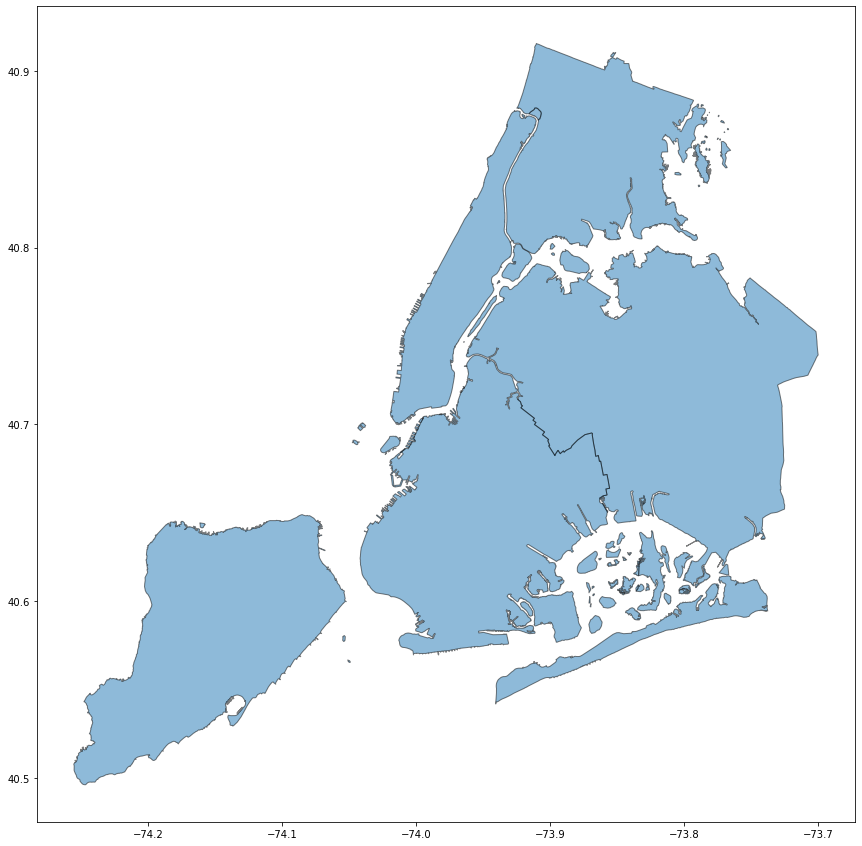

In [26]:
nycmap = gpd.read_file(gpd.datasets.get_path('nybb'))
nycmap = nycmap.to_crs(epsg=4326)
ax = nycmap.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')

In [29]:
geometry = [Point(xy) for xy in zip(coordinates['LAT'], coordinates['LONG'])]
crs = {'init': 'epsg:4326'}
stationsmap = gpd.GeoDataFrame(coordinates, crs=crs, geometry=geometry)

/Users/ju/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [30]:
stationsmap.head()

,STATION,LAT,LONG,geometry
1,Astoria Blvd,40.770258,-73.917843,POINT (40.77026 -73.91784)
2,30 Av,40.766779,-73.921479,POINT (40.76678 -73.92148)
3,Broadway,40.761820,-73.925508,POINT (40.76182 -73.92551)
4,36 Av,40.756804,-73.929575,POINT (40.75680 -73.92957)
5,39 Av-Dutch Kills,40.752882,-73.932755,POINT (40.75288 -73.93276)


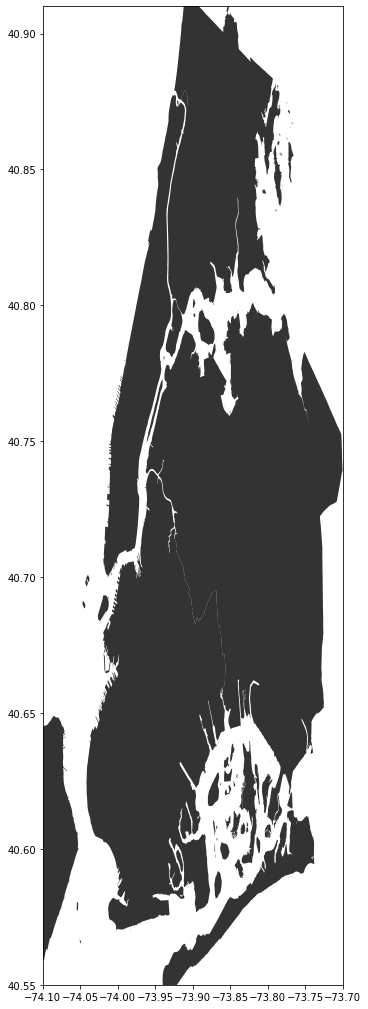

In [50]:
fig, ax = plt.subplots(figsize=(18,18))
ax.set_xlim(-74.1, -73.7)
ax.set_ylim(40.55, 40.91)
nycmap.plot(ax=ax, alpha= 0.8, color='black');
stationsmap.plot(ax=ax,color='#6495ED', markersize=50, marker='^');
